In [1]:
import sys
sys.path.append('C:\\Users\\DavidB\\PycharmProjects\\My_Football_Analytics\\Basics')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from Pitch.My_Pitch import \
    myPitch  # might need adaptation of path depending on whether it is used in pycharm or jupyter notebook
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
import numpy as np
from Data.Statsbomb_Data import match_events



None


In [3]:
df, teams = match_events(match_id=3857261, event_filter='passes')

In [4]:
df

,id,index,period,timestamp,minute,second,type,possession,possession_team,play_pattern,...,duration,related_events,pass,match_id,possession_team_id,team_id,player_id,under_pressure,off_camera,counterpress
0,285b3d0e-ed65-4f11-84ee-1ac2e6b0491e,5,1,00:00:00.371,0,0,Pass,2,Wales,From Kick Off,...,1.615000,[b7e37843-7498-42db-b117-ad4d40e0ed8c],"{'recipient': {'id': 3086, 'name': 'Ben Davies...",3857261,907,907,3517,NaN,NaN,NaN
1,cc3a9362-5f27-4b31-a11f-f776a3f12858,8,1,00:00:03.866,0,3,Pass,2,Wales,From Kick Off,...,2.742332,[916f2f17-c7ba-44b0-bce6-711b100f6d29],"{'length': 49.07311, 'angle': -0.16581869, 'he...",3857261,907,907,3086,NaN,NaN,NaN
2,916f2f17-c7ba-44b0-bce6-711b100f6d29,9,1,00:00:06.609,0,6,Pass,2,Wales,From Kick Off,...,2.893471,"[cc3a9362-5f27-4b31-a11f-f776a3f12858, dd4b8fa...","{'recipient': {'id': 4354, 'name': 'Philip Fod...",3857261,907,768,3943,NaN,NaN,NaN
3,544d2090-8f94-48d1-b78b-f3ffa62ba544,11,1,00:00:21.025,0,21,Pass,3,Wales,From Throw In,...,4.573407,"[88a6c333-6ec0-4019-98c7-d1109c3c14ef, 9c31f4d...","{'recipient': {'id': 3853, 'name': 'Kieffer Ro...",3857261,907,907,3086,NaN,NaN,NaN
4,88a6c333-6ec0-4019-98c7-d1109c3c14ef,14,1,00:00:25.598,0,25,Pass,3,Wales,From Throw In,...,4.625382,"[544d2090-8f94-48d1-b78b-f3ffa62ba544, b4c9473...","{'recipient': {'id': 10955, 'name': 'Harry Kan...",3857261,907,768,3244,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,ea1a4c69-03b0-4587-9d2b-0da7cf9e5c5a,3288,2,00:48:19.809,93,19,Pass,156,England,From Free Kick,...,0.416533,[c5919be5-1b37-438f-a378-eb91a0f42d6f],"{'recipient': {'id': 3616, 'name': 'Callum Wil...",3857261,768,768,9638,NaN,NaN,NaN
977,7e61deaa-1696-4b9d-82a7-f42879067605,3298,2,00:48:24.541,93,24,Pass,156,England,From Free Kick,...,0.796615,[9e0c67f4-ef33-4a0f-ad8b-b7df08b6dd66],"{'recipient': {'id': 4354, 'name': 'Philip Fod...",3857261,768,768,9638,NaN,NaN,NaN
978,259a1b8b-3ed8-4ed9-ba17-dd4baec49796,3305,2,00:48:27.239,93,27,Pass,156,England,From Free Kick,...,2.855230,NaN,"{'length': 33.672096, 'angle': -1.4696501, 'he...",3857261,768,907,4774,NaN,NaN,NaN
979,be72239d-9012-4b3d-9049-d7fae8227736,3306,2,00:48:55.723,93,55,Pass,157,England,From Throw In,...,1.672468,[069ae913-ee12-4380-88d9-e7ccdc0f62ac],"{'recipient': {'id': 9638, 'name': 'Jack Greal...",3857261,768,768,3664,NaN,NaN,NaN


In [5]:
from Pass_Data import pass_data
passdata = pass_data(df, data_source='Statsbomb', mirror_away=[''])
print(passdata)

pass_data object of Statsbomb of shape (981, 18). Coordinate ranges are (0, 120) for x and (80, 0) for y.


In [6]:
passdata.data

,player,period,minute,second,team,outcome,type,x_initial,y_initial,x_received,y_received,cross,cut-back,switch,shot_assist,goal_assist,play_pattern,related_events
0,Aaron Ramsey,1,0,0,Wales,Complete,Kick Off,60.0,40.0,36.5,28.7,False,False,False,False,False,From Kick Off,[b7e37843-7498-42db-b117-ad4d40e0ed8c]
1,Ben Davies,1,0,3,Wales,Incomplete,Regular,41.8,26.0,90.2,17.9,False,False,False,False,False,From Kick Off,[916f2f17-c7ba-44b0-bce6-711b100f6d29]
2,Declan Rice,1,0,6,England,Out,Recovery,29.9,62.2,56.8,80.0,False,False,False,False,False,From Kick Off,"[cc3a9362-5f27-4b31-a11f-f776a3f12858, dd4b8fa..."
3,Ben Davies,1,0,21,Wales,Incomplete,Throw-in,63.9,0.1,99.7,5.4,False,False,False,False,False,From Throw In,"[88a6c333-6ec0-4019-98c7-d1109c3c14ef, 9c31f4d..."
4,John Stones,1,0,25,England,Out,Recovery,20.4,74.7,74.5,80.0,False,False,False,False,False,From Throw In,"[544d2090-8f94-48d1-b78b-f3ffa62ba544, b4c9473..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,Jack Grealish,2,93,19,England,Complete,Regular,107.2,50.4,108.4,45.3,False,False,False,False,False,From Free Kick,[c5919be5-1b37-438f-a378-eb91a0f42d6f]
977,Jack Grealish,2,93,24,England,Complete,Regular,111.7,47.7,111.0,48.5,False,False,False,True,False,From Free Kick,[9e0c67f4-ef33-4a0f-ad8b-b7df08b6dd66]
978,Connor Roberts,2,93,27,Wales,Out,Regular,3.2,33.6,6.6,0.1,False,False,False,False,False,From Free Kick,NaN
979,Trent Alexander-Arnold,2,93,55,England,Complete,Throw-in,113.5,80.0,103.9,57.2,False,False,False,False,False,From Throw In,[069ae913-ee12-4380-88d9-e7ccdc0f62ac]


In [7]:
pE, pC = passdata.get_passes(get='England')

pBellingham, n = passdata.get_passes(get='Jude Bellingham', data=pE)
pBellingham

,player,period,minute,second,team,outcome,type,x_initial,y_initial,x_received,y_received,cross,cut-back,switch,shot_assist,goal_assist,play_pattern,related_events
12,Jude Bellingham,1,0,50,England,Complete,Regular,80.4,76.9,84.7,70.1,False,False,False,False,False,Regular Play,[e6b312b3-f913-4835-8a4a-b6b3722ca506]
17,Jude Bellingham,1,1,8,England,Complete,Regular,47.6,67.8,51.6,71.7,False,False,False,False,False,Regular Play,"[51abba94-63a1-4c94-9a8b-e3cfd180648b, 8345ef2..."
27,Jude Bellingham,1,1,45,England,Complete,Regular,69.3,23.1,63.4,13.8,False,False,False,False,False,Regular Play,[57dbf37b-bd79-4643-9d0c-e4b70c408821]
30,Jude Bellingham,1,1,50,England,Complete,Regular,51.4,17.3,42.4,43.4,False,False,False,False,False,Regular Play,[6b7f3ad1-dfab-4b2f-a5e0-987eb6598b5c]
43,Jude Bellingham,1,2,32,England,Complete,Regular,41.9,21.0,42.2,55.4,False,False,False,False,False,Regular Play,[88bc24ed-c483-459c-a421-fac102671516]
54,Jude Bellingham,1,3,5,England,Complete,Regular,81.5,23.1,83.1,16.3,False,False,False,False,False,Regular Play,[4c0fa148-e36b-4572-b568-bcd458901197]
89,Jude Bellingham,1,5,51,England,Complete,Regular,56.9,7.9,67.7,17.4,False,False,False,False,False,Regular Play,[6f3b672a-d2d0-4dbe-bd6a-f151013e6706]
124,Jude Bellingham,1,8,37,England,Complete,Regular,44.8,64.0,35.6,78.7,False,False,False,False,False,From Throw In,[f728f377-172f-4f93-bb3a-b27d21046f90]
139,Jude Bellingham,1,9,19,England,Complete,Regular,65.9,42.3,49.6,28.0,False,False,False,False,False,Regular Play,[fdf9931d-c0e5-46d7-b07f-5e54e4178ad7]
147,Jude Bellingham,1,9,40,England,Complete,Regular,69.3,7.0,65.4,21.4,False,False,False,False,False,Regular Play,[5606314e-1eda-45f0-bdf7-18f9f5192d58]


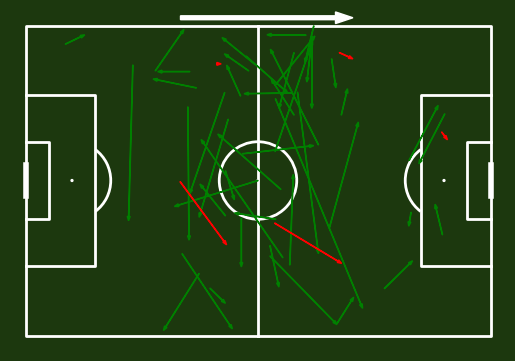

In [10]:
pm = passdata.pass_map(pdop_y=-0.025, pdop_o=1,data=pBellingham)

In [12]:
passdata2 = pass_data(df, data_source='Statsbomb', mirror_away=[''], scale_to_pitch='myPitch')
print(passdata2)

pass_data object of Statsbomb of shape (981, 18). Coordinate ranges are (0, 105) for x and (0, 65) for y.


In [14]:
pBellingham, n = passdata2.get_passes(get='Jude Bellingham')
pBellingham

,player,period,minute,second,team,outcome,type,x_initial,y_initial,x_received,y_received,cross,cut-back,switch,shot_assist,goal_assist,play_pattern,related_events
12,Jude Bellingham,1,0,50,England,Complete,Regular,70.3500,2.51875,74.1125,8.04375,False,False,False,False,False,Regular Play,[e6b312b3-f913-4835-8a4a-b6b3722ca506]
17,Jude Bellingham,1,1,8,England,Complete,Regular,41.6500,9.91250,45.1500,6.74375,False,False,False,False,False,Regular Play,"[51abba94-63a1-4c94-9a8b-e3cfd180648b, 8345ef2..."
27,Jude Bellingham,1,1,45,England,Complete,Regular,60.6375,46.23125,55.4750,53.78750,False,False,False,False,False,Regular Play,[57dbf37b-bd79-4643-9d0c-e4b70c408821]
30,Jude Bellingham,1,1,50,England,Complete,Regular,44.9750,50.94375,37.1000,29.73750,False,False,False,False,False,Regular Play,[6b7f3ad1-dfab-4b2f-a5e0-987eb6598b5c]
43,Jude Bellingham,1,2,32,England,Complete,Regular,36.6625,47.93750,36.9250,19.98750,False,False,False,False,False,Regular Play,[88bc24ed-c483-459c-a421-fac102671516]
54,Jude Bellingham,1,3,5,England,Complete,Regular,71.3125,46.23125,72.7125,51.75625,False,False,False,False,False,Regular Play,[4c0fa148-e36b-4572-b568-bcd458901197]
89,Jude Bellingham,1,5,51,England,Complete,Regular,49.7875,58.58125,59.2375,50.86250,False,False,False,False,False,Regular Play,[6f3b672a-d2d0-4dbe-bd6a-f151013e6706]
124,Jude Bellingham,1,8,37,England,Complete,Regular,39.2000,13.00000,31.1500,1.05625,False,False,False,False,False,From Throw In,[f728f377-172f-4f93-bb3a-b27d21046f90]
139,Jude Bellingham,1,9,19,England,Complete,Regular,57.6625,30.63125,43.4000,42.25000,False,False,False,False,False,Regular Play,[fdf9931d-c0e5-46d7-b07f-5e54e4178ad7]
147,Jude Bellingham,1,9,40,England,Complete,Regular,60.6375,59.31250,57.2250,47.61250,False,False,False,False,False,Regular Play,[5606314e-1eda-45f0-bdf7-18f9f5192d58]


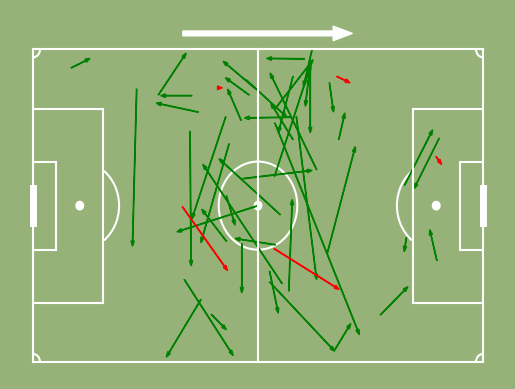

In [18]:
pm = passdata2.pass_map(pdop_y=1.05, pdop_o=1,data=pBellingham, pitch_col='#96b279')